In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import plotly.graph_objs as go

In [2]:
data = pd.read_csv("500_Cities__Local_Data_for_Better_Health__2017_release.csv")
data.shape

(810103, 24)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810103 entries, 0 to 810102
Data columns (total 24 columns):
Year                          810103 non-null int64
StateAbbr                     810103 non-null object
StateDesc                     810103 non-null object
CityName                      810047 non-null object
GeographicLevel               810103 non-null object
DataSource                    810103 non-null object
Category                      810103 non-null object
UniqueID                      810103 non-null object
Measure                       810103 non-null object
Data_Value_Unit               810103 non-null object
DataValueTypeID               810103 non-null object
Data_Value_Type               810103 non-null object
Data_Value                    789432 non-null float64
Low_Confidence_Limit          789432 non-null float64
High_Confidence_Limit         789432 non-null float64
Data_Value_Footnote_Symbol    20671 non-null object
Data_Value_Footnote           20671 non-

In [13]:
print(f"There are {data['Category'].nunique()} categories:")
print(data['Category'].value_counts())
print()
print(f"And {data['GeographicLevel'].nunique()} geographic levels:")
print(data['GeographicLevel'].value_counts())

There are 3 categories:
Health Outcomes        376673
Prevention             288400
Unhealthy Behaviors    145030
Name: Category, dtype: int64

And 3 geographic levels:
Census Tract    782047
City             28000
US                  56
Name: GeographicLevel, dtype: int64


In [15]:
pv_ct = data.loc[(data['Category'] == 'Prevention') & (data['GeographicLevel'] == 'Census Tract')]
ub_ct = data.loc[(data['Category'] == 'Unhealthy Behaviors') & (data['GeographicLevel'] == 'Census Tract')]
ho_ct = data.loc[(data['Category'] == 'Health Outcomes') & (data['GeographicLevel'] == 'Census Tract')]

In [21]:
pv_ct['MeasureId'].value_counts()

DENTAL          28004
CHECKUP         28004
BPMED           28004
CHOLSCREEN      28004
ACCESS2         27971
PAPTEST         27910
COLON_SCREEN    27845
MAMMOUSE        27725
COREM           27462
COREW           27451
Name: MeasureId, dtype: int64

In [78]:
prevention = list(pv_ct['MeasureId'].value_counts().index)
unhealthy = list(ub_ct['MeasureId'].value_counts().index)
outcome = list(ho_ct['MeasureId'].value_counts().index)

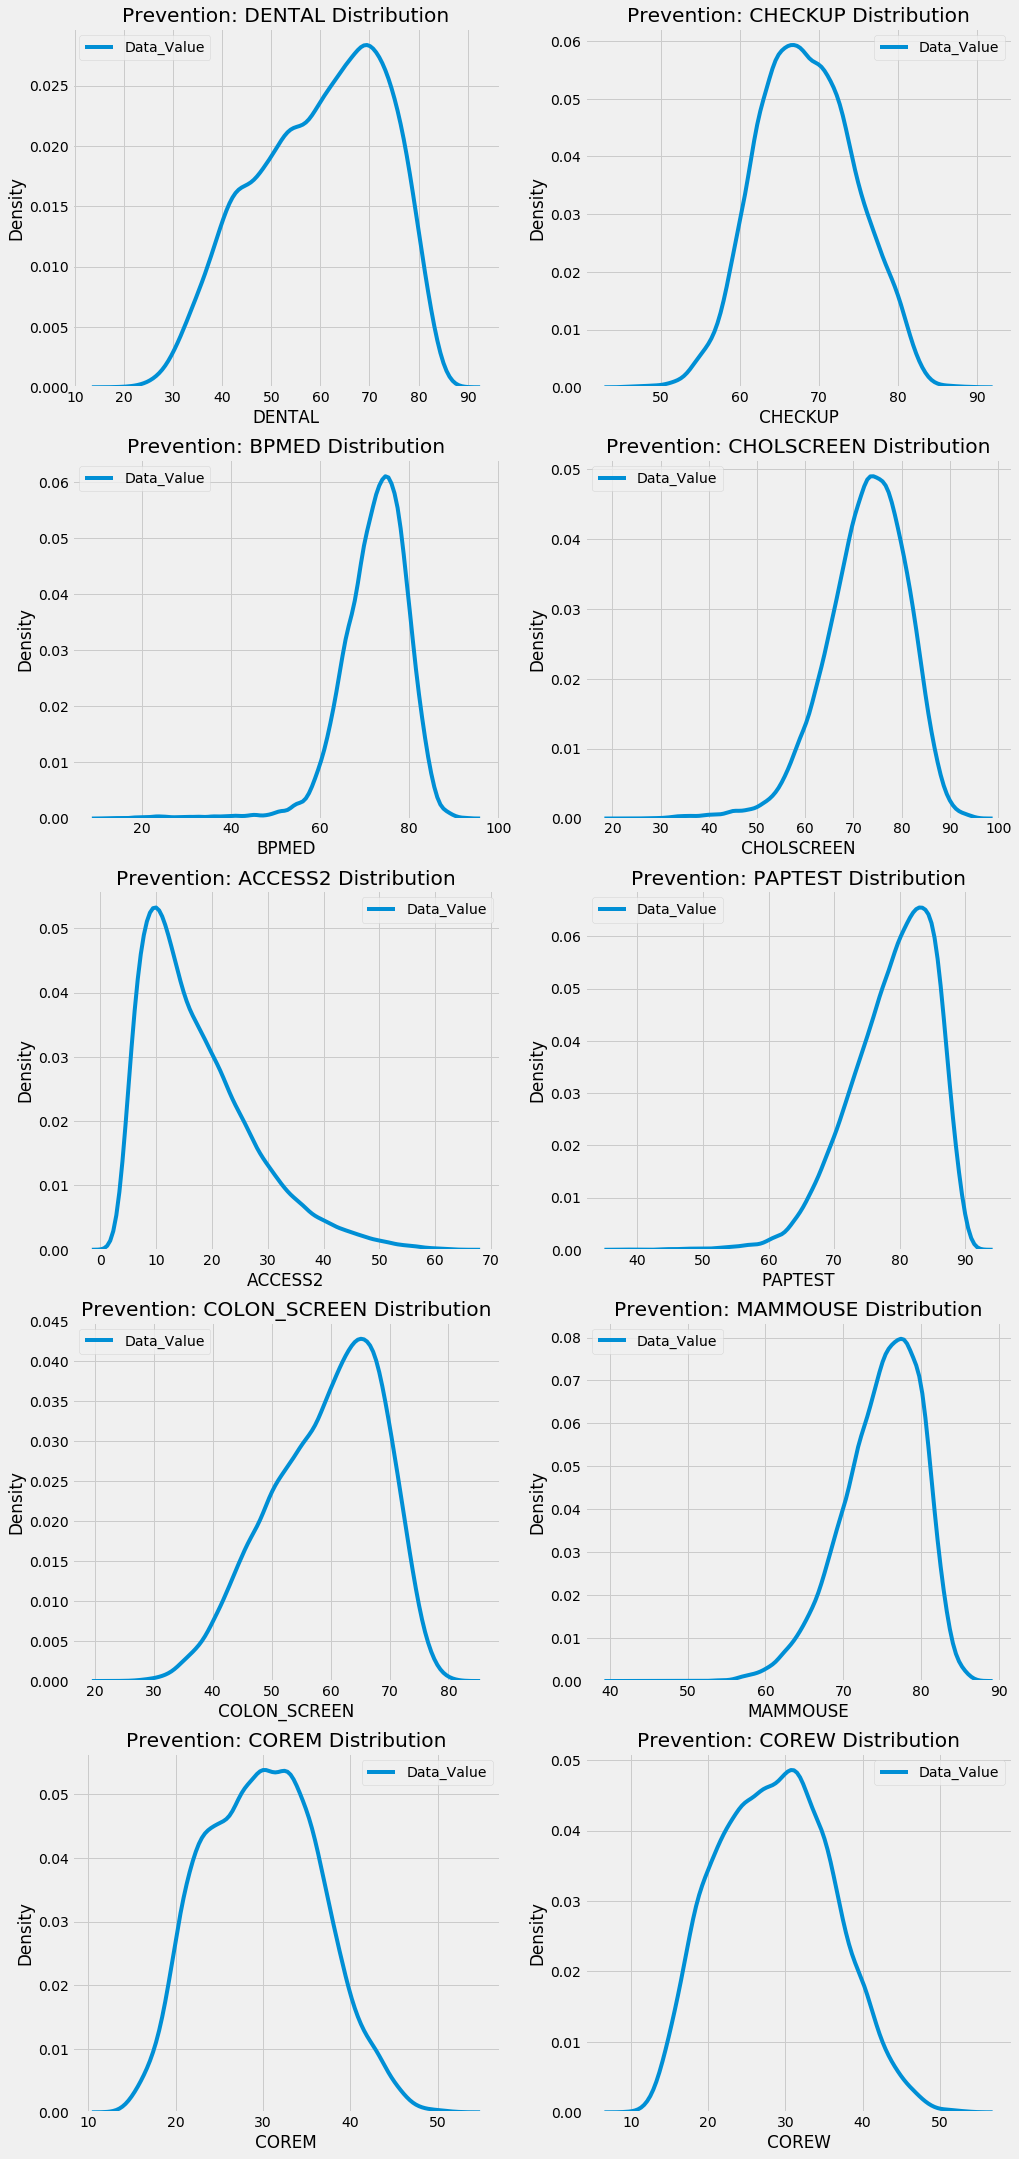

In [73]:
plt.figure(figsize = (15, 15))
for i, pv in enumerate(prevention):
    sns.kdeplot(pv_ct.loc[pv_ct['MeasureId'] == pv, 'Data_Value'].dropna(),
                ax = plt.subplot(5, 2, i + 1))
    plt.title(f"Prevention: {pv} Distribution")
    plt.xlabel(f"{pv}")
    plt.ylabel(f"Density")
plt.subplots_adjust(top = 2)

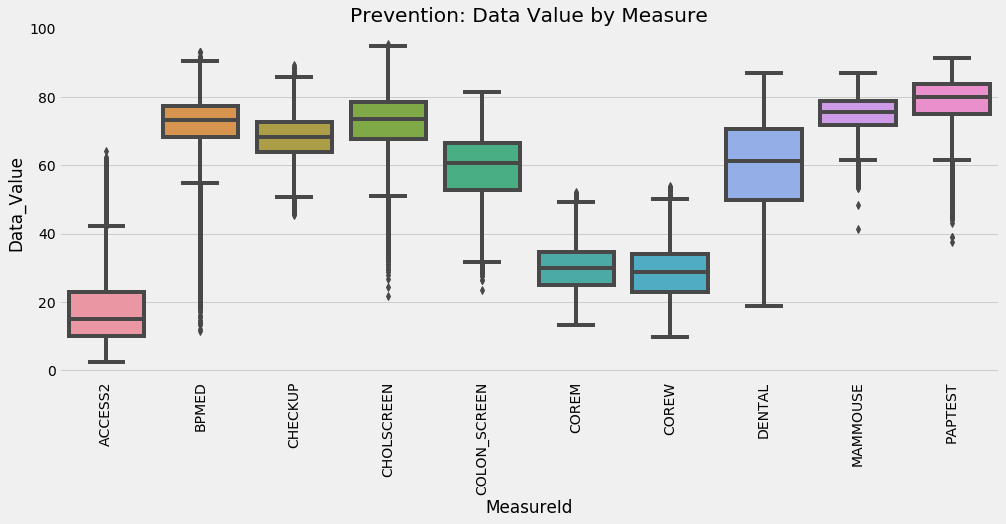

In [99]:
plt.figure(figsize = (15, 6))
sns.boxplot(x = 'MeasureId', y = 'Data_Value', data = pv_ct);
plt.title('Prevention: Data Value by Measure');
plt.xticks(rotation = 'vertical');

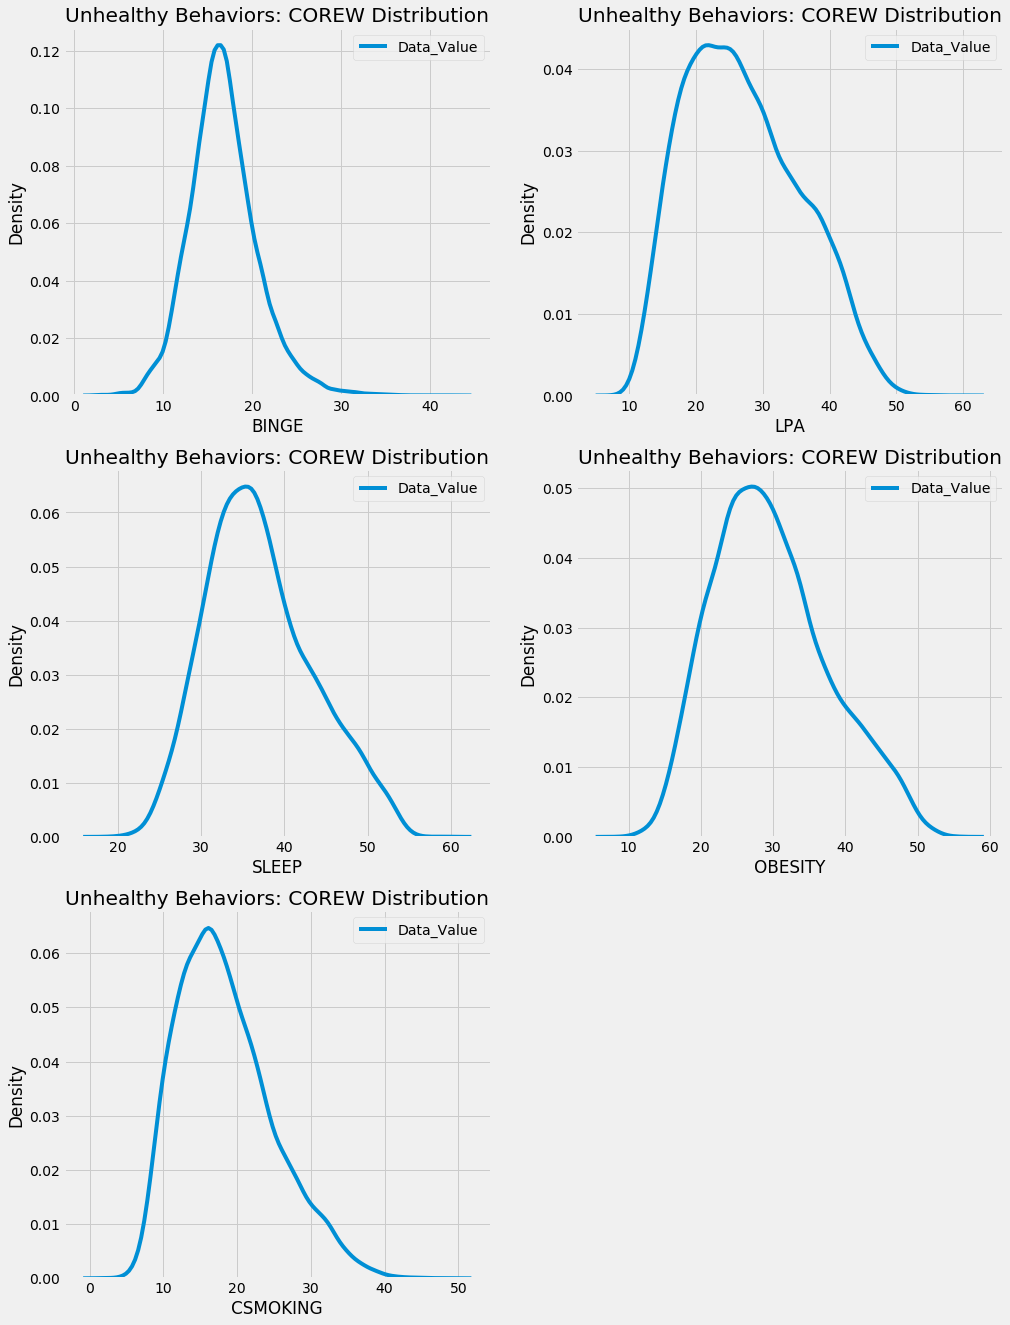

In [84]:
plt.figure(figsize = (15, 9))
for i, ub in enumerate(unhealthy):
    sns.kdeplot(ub_ct.loc[ub_ct['MeasureId'] == ub, 'Data_Value'].dropna(),
                ax = plt.subplot(3, 2, i + 1))
    plt.title(f"Unhealthy Behaviors: {pv} Distribution")
    plt.xlabel(f"{ub}")
    plt.ylabel(f"Density")
plt.subplots_adjust(top = 2)

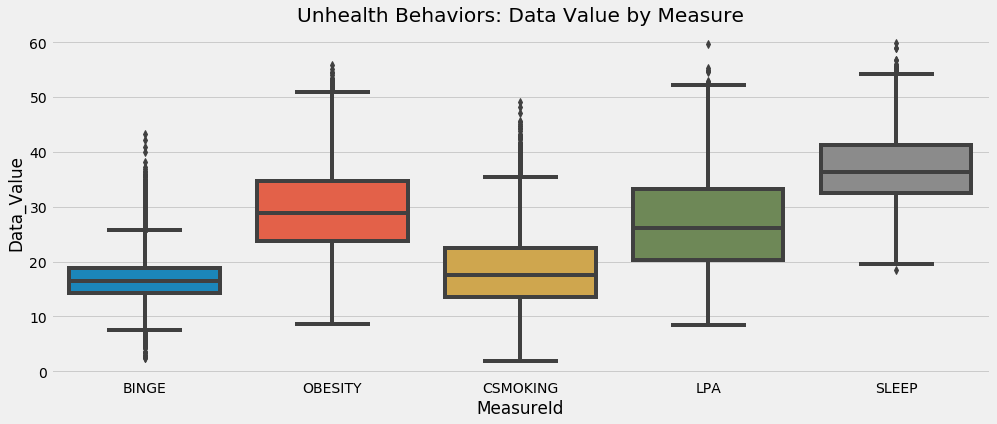

In [92]:
plt.figure(figsize = (15, 6))
sns.boxplot(x = 'MeasureId', y = 'Data_Value', data = ub_ct);
plt.title('Unhealth Behaviors: Data Value by Measure');

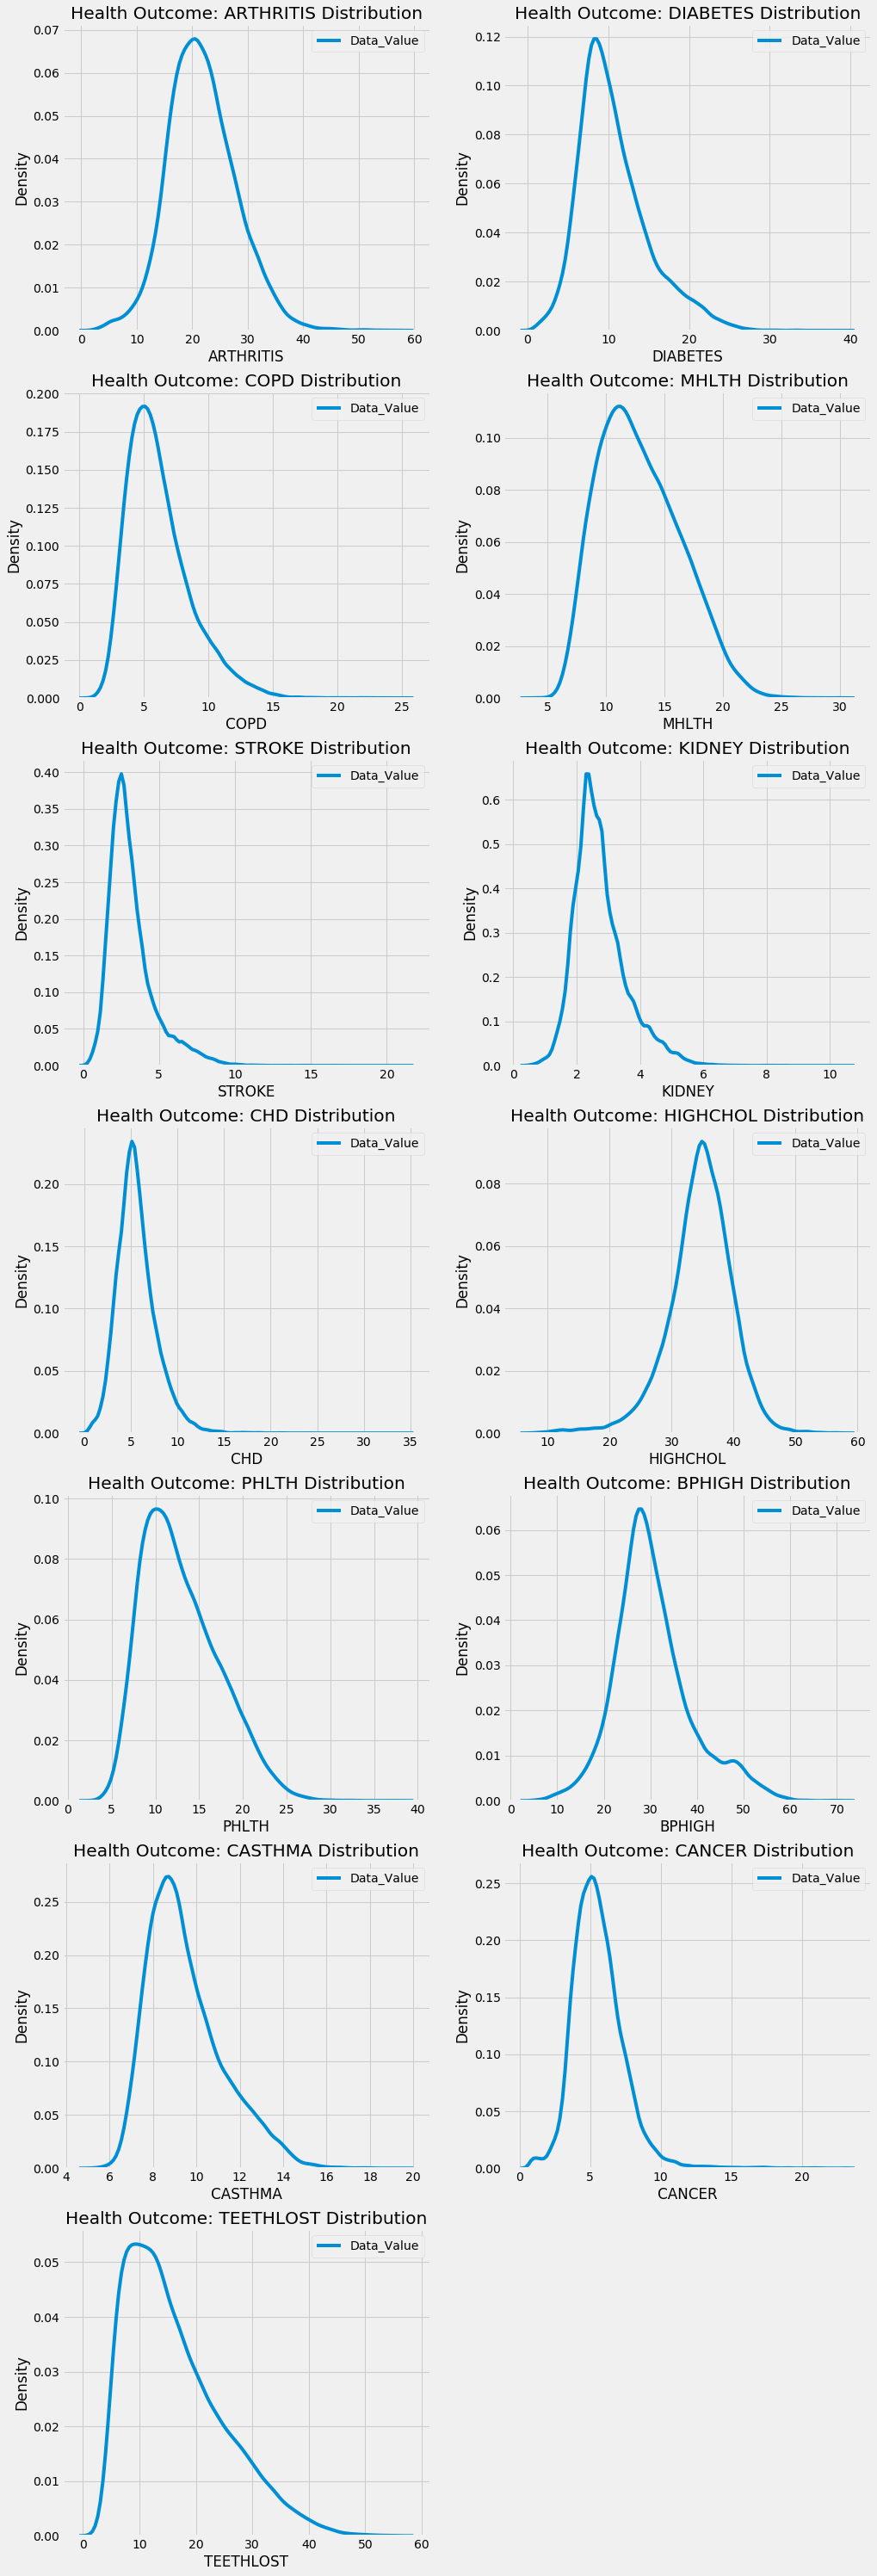

In [86]:
plt.figure(figsize = (15, 21))
for i, ho in enumerate(outcome):
    sns.kdeplot(ho_ct.loc[ho_ct['MeasureId'] == ho, 'Data_Value'].dropna(),
                ax = plt.subplot(7, 2, i + 1))
    plt.title(f"Health Outcome: {ho} Distribution")
    plt.xlabel(f"{ho}")
    plt.ylabel(f"Density")
plt.subplots_adjust(top = 2)

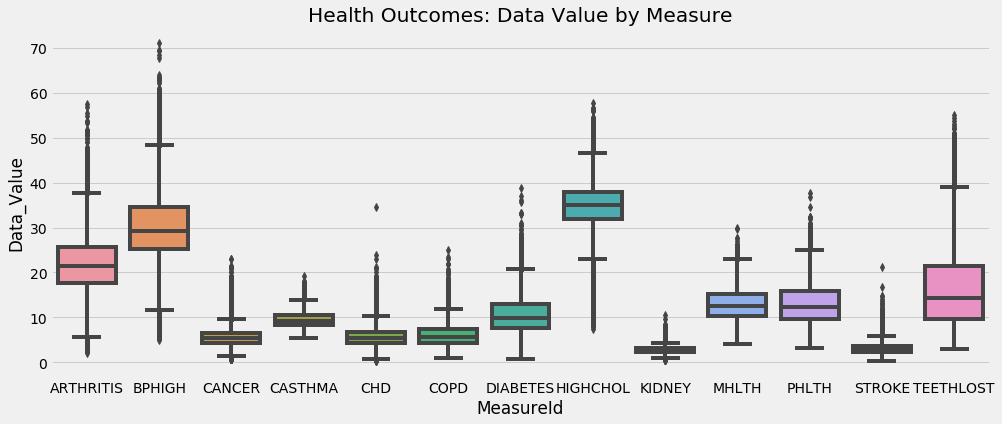

In [93]:
plt.figure(figsize = (15, 6))
sns.boxplot(x = 'MeasureId', y = 'Data_Value', data = ho_ct);
plt.title('Health Outcomes: Data Value by Measure');

In [94]:
citylevel = data.loc[(data['Data_Value'].notnull()) & (data['GeographicLevel'] == 'City') & (data['DataValueTypeID'] == 'AgeAdjPrv')]

In [95]:
HBP_city = citylevel.loc[citylevel['Measure'] == 'High blood pressure among adults aged >=18 Years']
Can_city = citylevel.loc[citylevel['Measure'] == 'Cancer (excluding skin cancer) among adults aged >=18 Years']
CHD_city = citylevel.loc[citylevel['Measure'] == 'Coronary heart disease among adults aged >=18 Years']
DD_city = citylevel.loc[citylevel['Measure'] == 'Diagnosed diabetes among adults aged >=18 Years']

In [96]:
from plotly.graph_objs import *
trace1 = go.Scatter3d(
    x = HBP_city.Data_Value,
    y = Can_city.Data_Value,
    z = CHD_city.Data_Value,
    #u = DD_city.Data_Value,
    mode = 'markers',
    name = 'markers',
    marker = dict(size = 8, color = CHD_city.Data_Value, colorscale = 'Viridis', opacity = 0.8))
dat = [trace1]
layout = go.Layout(margin = dict(l = 0,
                                 r = 0,
                                 b = 0,
                                 t = 0),
                   scene = Scene(xaxis = XAxis(title = 'High Blood Pressure'),
                                 yaxis = YAxis(title = 'Cancer'),
                                 zaxis = ZAxis(title = 'Heart Disease')))
fig = go.Figure(data = dat, layout = layout)
iplot(fig)

/Users/TEN/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:531: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis


/Users/TEN/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:558: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


/Users/TEN/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:582: DeprecationWarning:

plotly.graph_objs.ZAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.scene.ZAxis


/Users/TEN/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:477: DeprecationWarning:

plotly.graph_objs.Scene is deprecated.
Please replac